# Random Forest

In [30]:
#Import Libraries
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [38]:
dataset=pd.read_csv(r"../../Data Science/Cursos Online/Udemy/Machine-Learning-A-Z-New/Machine Learning A-Z New" \
                    "/Part 3 - Classification\Section 14 - Logistic Regression/Social_Network_Ads.csv")

# # Categorical boolean mask
categorical_feature_mask = dataset.dtypes==object

# # filter categorical columns using mask and turn it into a list
categorical_cols = dataset.columns[categorical_feature_mask].tolist()

# # import labelencoder
from sklearn.preprocessing import LabelEncoder

# # instantiate labelencoder object
le = LabelEncoder()

dataset[categorical_cols] = dataset[categorical_cols].apply(lambda col: le.fit_transform(col))

X=dataset.iloc[:,2:4].values
y=dataset.iloc[:,-1].values

X_col = dataset.columns[2:4]

# # Splitting training and testing
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test= tts(X,y, test_size=0.25, random_state=0)

# # Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)
X=sc_X.transform(X)

In [63]:
classifier= RandomForestClassifier(n_estimators =10,criterion = 'entropy',bootstrap=True,random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [64]:
print('Training set score:{:.3f}\nTest set score:{:.3f}'.format(classifier.score(X_train, y_train),
                                                                classifier.score(X_test, y_test)))

Training set score:0.980
Test set score:0.910


In [65]:
from sklearn.metrics import confusion_matrix

df_confusion=pd.DataFrame(confusion_matrix(y_test, y_pred), columns = ['MODEL_F','MODEL_P'], index = ['DATA_F','DATA_P'])
df_confusion

,MODEL_F,MODEL_P
DATA_F,63,5
DATA_P,4,28


In [66]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93        68
           1       0.85      0.88      0.86        32

    accuracy                           0.91       100
   macro avg       0.89      0.90      0.90       100
weighted avg       0.91      0.91      0.91       100



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


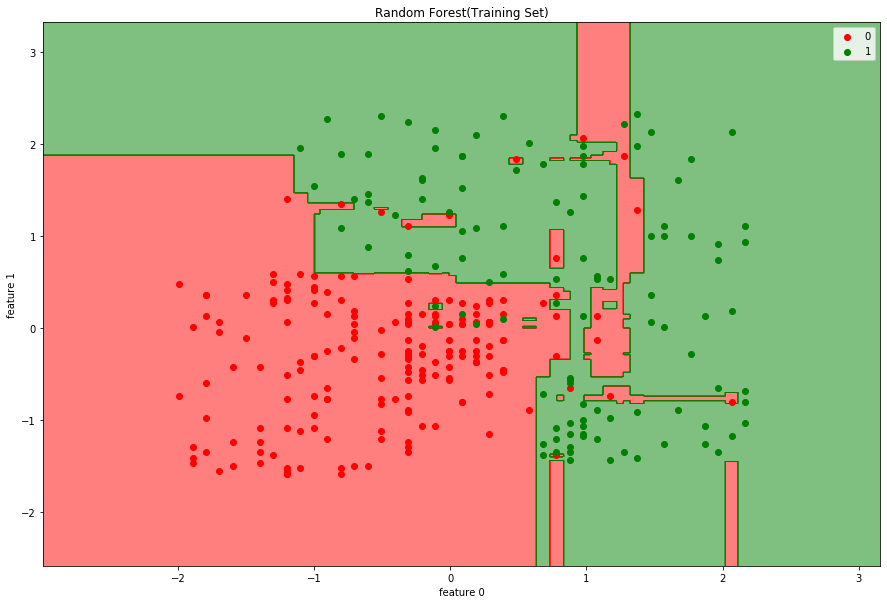

In [67]:
from matplotlib.colors import ListedColormap

figure=plt.figure(figsize=(15,10))

X1, X2 = np.meshgrid(np.arange(start= X_test[:,0].min() -1, stop= X_test[:,0].max() +1, step = 0.01),
                     np.arange(start= X_test[:,1].min() -1, stop= X_test[:,1].max() +1, step = 0.01))

plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.5, 
                                                                                    cmap= ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i,j in enumerate(np.unique(y_train)):
    plt.scatter(X_train[y_train== j,0], X_train[y_train==j, 1],
               c=ListedColormap(('red','green'))(i), label=j)
    
plt.title('Random Forest(Training Set)')
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.legend(loc='best')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


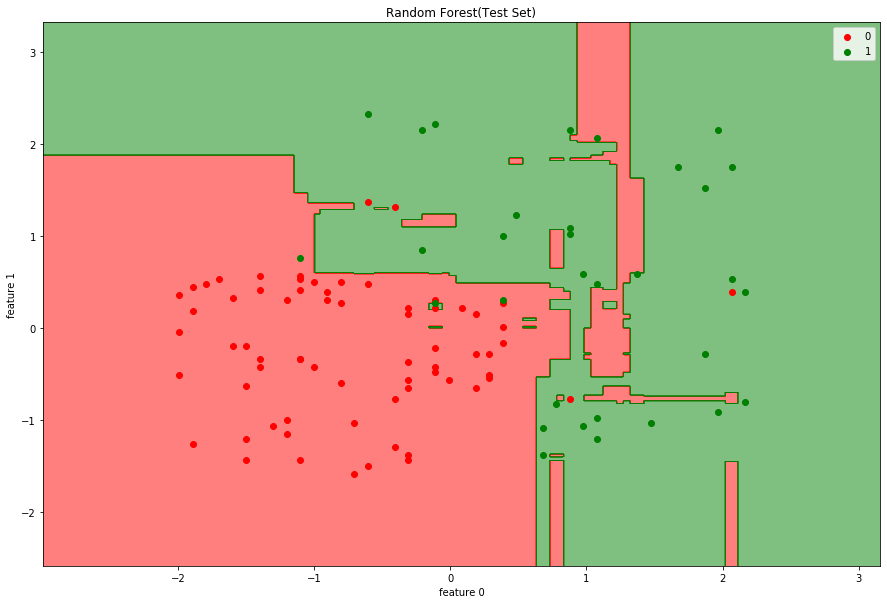

In [68]:
figure=plt.figure(figsize=(15,10))

X1, X2 = np.meshgrid(np.arange(start= X_test[:,0].min() -1, stop= X_test[:,0].max() +1, step = 0.01),
                     np.arange(start= X_test[:,1].min() -1, stop= X_test[:,1].max() +1, step = 0.01))
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.5, 
                                                                                    cmap= ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i,j in enumerate(np.unique(y_test)):
    plt.scatter(X_test[y_test== j,0], X_test[y_test==j, 1],
               c=ListedColormap(('red','green'))(i), label=j)
    
plt.title('Random Forest(Test Set)')
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.legend(loc='best')

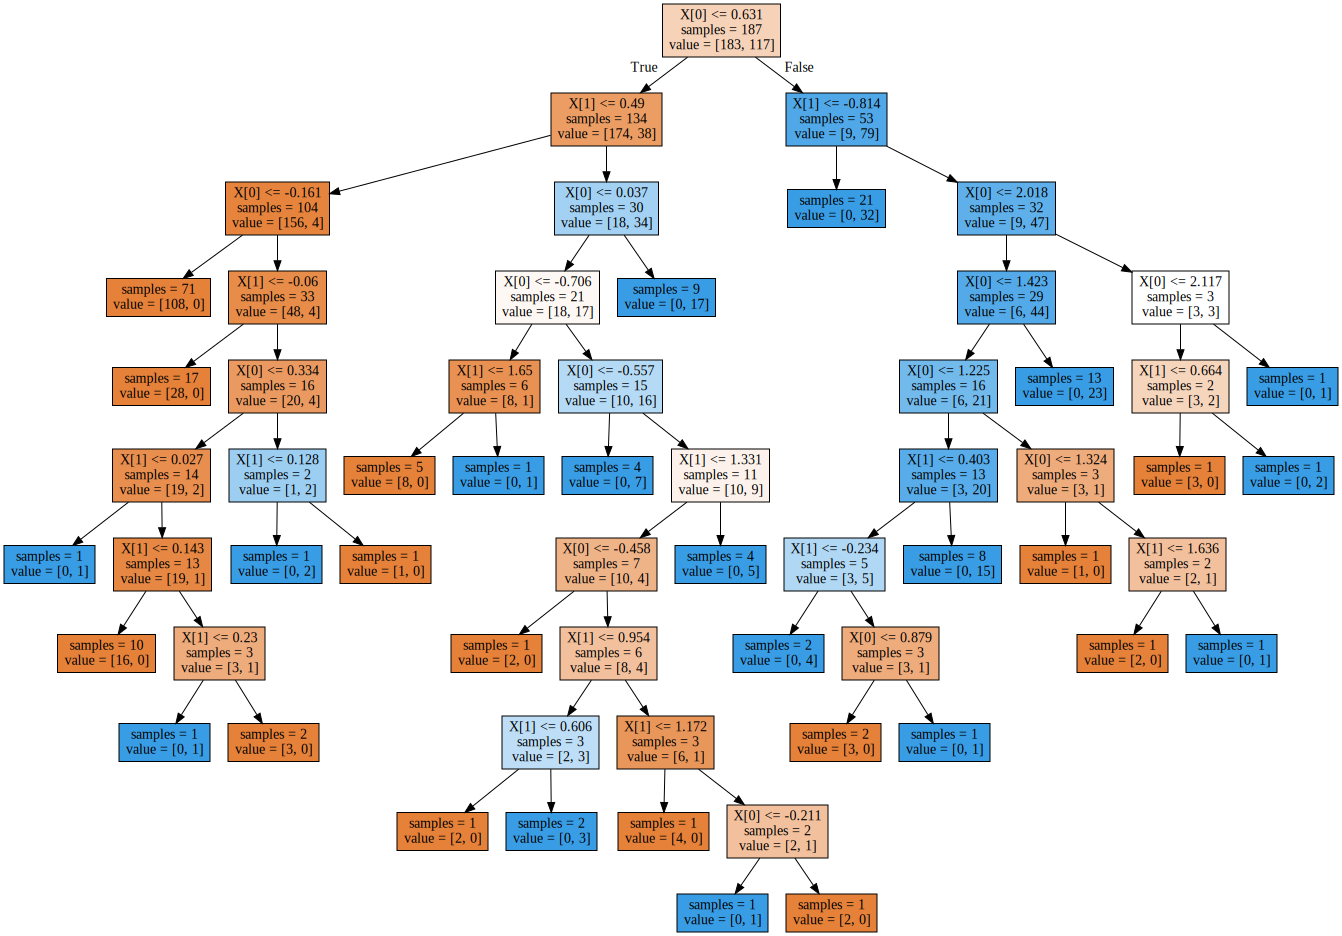

In [69]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(classifier.estimators_[0], out_file='tree.dot',impurity=False, filled=True)

with open('tree.dot') as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Random decision forests correct for decision trees' habit of overfitting to their training set.

- Adress the problem of overfiting by using a simple decision tree. Inject randomness into the tree building to ensure each tree is different
- Boostrap sample : for each n_samples repeatedly, it draws an example with randomly replacement>>> datset has the same legnht of the original datset, but some points will be missing - and some others will be repeated.
ex: [1,2,3,4] ---> ans: [2,2,3,4]
- In each node the algo. randomly selects a subset of the features, and it looks for the best possible test involving one of these features. These two different steps (bootstramp abd feature selection) ensure that all trees are different (random forest)
- max_features > crucial parameter. Number of features used. high max_features> trees will be quite similar. low max_features> trees quite different (need to have high max_depth)
- classification (make a prediction fo every tree: soft voting strategy. Each algorithm makes a soft prediction + probability. The probabilities are all averaged - the class with the highest probability is predicted) and regression (it takes the average of the trees) 

In [ ]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split as tts
import mglearn.plots

## CASE 2 - SALARY PREDICTION ##

dataset=pd.read_csv(r'../../Data Science/Cursos Online/Udemy/Machine-Learning-A-Z-New/Machine Learning A-Z New/Part 2 - Regression/Section 8 - Decision Tree Regression/Position_Salaries.csv')

X=dataset.iloc[:,1:2].values
y=dataset.iloc[:,-1].values

X_train, X_test, y_train, y_test= X,X,y,y

scores=[]

for estimator in range(1,100):
    tree = RandomForestRegressor(n_estimators=estimator, random_state=0)
    tree.fit(X_train, y_train)
    scores.append(tree.score(X_train, y_train))
#     print('Estimators {}\nTraining set score:{:.3f}\nTest set score:{:.3f}\n'.format(estimator,tree.score(X_train, y_train),tree.score(X_test, y_test)))


plt.plot(np.arange(1,100),scores)
plt.xlabel('number of estimators')
plt.ylabel('score')

trees = RandomForestRegressor(n_estimators=10, random_state=0)
trees.fit(X_train, y_train)

plt.plot(X,y,'o')
# plt.plot(X,trees.predict(X))
plt.plot(X_grid,trees.predict(X_grid),)
# plt.xticks(dataset.iloc[:,0], rotation=90)
plt.title('Random Tree Regression')
plt.ylabel(dataset.columns[-1])
plt.subplots_adjust(bottom=0.15)
plt.legend(['data','data predictions', 'generalization'])

# tested_value=

fig, axes= plt.subplots(10,4,figsize=(20,40))

for i,ax in zip(np.arange(1,10,0.25),axes.ravel()):
    tested_value=i
    decision=trees.predict([[tested_value]])*np.ones(len(trees.estimators_))
    pred= []
    for j in range(len(trees.estimators_)):
        pred.append(trees.estimators_[j].predict([[tested_value]]))
        ind=np.arange(len(trees.estimators_))

    ax.plot(ind,pred)
    ax.plot(ind,decision)
#     ax.set_xlabel('Trees')
#     ax.set_ylabel('Pred.')
    ax.set_title('Tested Value : {}'.format(i))
    
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(trees.estimators_[1], out_file='tree.dot',impurity=False, filled=True)

with open('tree.dot') as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

from sklearn.tree import export_graphviz
import graphviz

export_graphviz(trees.estimators_[1], out_file='tree.dot',impurity=False, filled=True)

with open('tree.dot') as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))